In [6]:

# Karatsuba multiplication
# more complicated for ints with >2 digits

x,y = 20,31
x = list(str(x))
y = list(str(y))

start = int(x[0]) * int(y[0])

mid = int(x[1]) * int(y[0]) + int(x[0]) * int(y[1])

end = int(x[-1]) * int(y[-1])

str(start)+str(mid)+str(end)



'620'

In [46]:
## mergesort array of numbers

# split array in half and solve each half recursively

def mergesort(input_list):
    """
    The version only works on list of exactly 2^n length
    """

    length = len(input_list)
    middle_index = length//2
    a = input_list[:middle_index]
    b = input_list[middle_index:]


    if len(a) > 1:
        a = mergesort(a)
        b = mergesort(b)

    ## merge stage
    #a = [3, 999] # add single val to make the below work
    #b = [5]
    a.append(999)  # add single val to ensure no subsetting errors below
    b.append(999) 
    res = []
    i = 0
    j = 0
    for k in range(len(a) + len(b) -2):
        if a[i] < b[j]:
            res.append(a[i])
            i += 1
        else:
            res.append(b[j])
            j += 1

    print(res)
    return res

input_list = [1, 3, 4, 2, 7, 2, 1, 0]
mergesort(input_list)


[1, 3]
[2, 4]
[1, 2, 3, 4]
[2, 7]
[0, 1]
[0, 1, 2, 7]
[0, 1, 1, 2, 2, 3, 4, 7]


[0, 1, 1, 2, 2, 3, 4, 7]

In [ ]:
# worst case analysis: imagine someone is trying to make the algo as slow as possible by picking mean inputs:
# How slow could they make it?



Asymptotic analysis: run time as a function of n


In [55]:
## Counting inversions in an array

# inversion: pair of values where val1 > val2


# have recursive algo both count inversions and sort; piggyback on mergesort




def mergesort_and_count_inversions(input_list, inversions_count):
    """
    The version only works on list of exactly 2^n length
    
    Overcounts inversions_count: something to do with the append(999) hack 
    """

    length = len(input_list)
    middle_index = length//2
    a = input_list[:middle_index]
    b = input_list[middle_index:]


    if len(a) > 1:
        a, inv_count = mergesort_and_count_inversions(a, 0)
        b, inv_count2 = mergesort_and_count_inversions(b, 0)  
        inversions_count += inv_count
        inversions_count += inv_count2

    ## merge stage
    #a = [3, 999] # add single val to make the below work
    #b = [5]
    a.append(999)  # add single val to ensure no subsetting errors below
    b.append(999) 
    res = []
    i = 0
    j = 0
    for k in range(len(a) + len(b) -2):
        if a[i] < b[j]:
            res.append(a[i])
            i += 1
        else:
            res.append(b[j])
            j += 1
            inversions_count += 1

    print(inversions_count)
    return res, inversions_count

input_list = [1, 4, 3, 5]
mergesort_and_count_inversions(input_list, 0)


1
1
4


([1, 3, 4, 5], 4)

Strassen's subcubic matrix multiplication: formula to recursively get results of matrix mult, in sub O(n^3) time


In [ ]:
## O(n log n) Closest pair on 2d plane. Euclidean distance.

# for 1d distances, can mergesort (n log n) to put closest next to each other, which is faster than searching
# all dimensions - which is O(n^2)

# one option: mergesort both dimensions, then brute force search N nearby coordinates (or coords in a particular
# subbucket)

# mergesort O(n log n)
# 2d mergesort + brute force = O(n log n) Because the N nearby coordinates searched is constant, and doing mergesort
        # twice only double runtime, which doesn't affect big O notation
    



#### "Master method": for measuring Big-O runtime of algorithms

Notation (T = work done in recursion call; O = work done outside recursion): 3T(n / 2) + O(n)  

General formula for runtime of recursive functions (in some cases): 

T(n) <= aT(n / b) + O(n ^ d)

>d = exponent of 'combine' step running time

>a = number of subproblems in the recursion

>b = input size shrinkage factor

See google slides 2 + 3 






In [93]:
## Quicksort

# pick one element in array to act as 'pivot'; 
# rearrange so everything to left is less than pivot, and RHS are higher (side effect is to put 
# the pivot element in it's right place)

# after arranging of RHS and LHS of pivot element, recursively do this on either side of the algo

# says this requires less values in memory use than mergesort (if one does the 'inplace' implementation
# which I don't do below)


def quicksort(input_list):
    
    """
    pivot_ix should be median of input values for optimal performance, however 'close enough' pivot_ix
    is good enough 
    """
    
    pivot_ix = len(input_list) // 2
    pivot_element = input_list.pop(pivot_ix)

    a = []
    b = []
    for val in input_list:
        if val < pivot_element:
            a.append(val)
        else:
            b.append(val)

    if len(a) > 1:
        a = quicksort(a)
        
    if len(b) > 1:
        b = quicksort(b)
    
    return a + [pivot_element] + b
    


input_list = [1, 4, 3, 5, 2, 9, 0, 7, 11, -4]
quicksort(input_list)



[-4, 0, 1, 2, 3, 4, 5, 7, 9, 11]

In [101]:
%%time
for i in range(10_000):
    input_list = [1, 4, 3, 5, 2, 9, 0, 7, 11, -4]
    quicksort(input_list)

CPU times: user 56.7 ms, sys: 1.97 ms, total: 58.7 ms
Wall time: 57.5 ms


reduction: applying a known solution to another problem

eg: selecting i'th largest element in an array 'reduces' to mergesort


In [154]:
## quickselect: looking for i'th smallest element in array

# like quicksort, but only recurse on one side (which ever side i'th value is), so it runs in O(n)


def quickselect(input_list, n):
    """
    Almost entirely works, though gets errors on some inputs (eg n = 2 in example below)
    """
    
    print(input_list)
    pivot_ix = len(input_list) // 2
    pivot_element = input_list.pop(pivot_ix)

    a = []
    b = []
    for val in input_list:
        if val < pivot_element:
            a.append(val)
        else:
            b.append(val)
        
    print(a, b)
    print(pivot_element)
    
    if len(a) == n:
        return pivot_element # answer. Not returning for some reason
    elif len(a) == 1:
        return a[1]
    elif len(a) > n:
        quickselect(a, n)
    elif len(b) == 1:
        return b[0]
    else:
        quickselect(b, n)
        


input_list = [1, 4, 3, 5, 2, 9, 0, 7, 11, -4]
quickselect(input_list, 2)






[1, 4, 3, 5, 2, 9, 0, 7, 11, -4]
[1, 4, 3, 5, 2, 0, 7, -4] [11]
9
[1, 4, 3, 5, 2, 0, 7, -4]
[1, 0, -4] [4, 3, 5, 7]
2
[1, 0, -4]
[-4] [1]
0


IndexError: list index out of range

In [ ]:
## Graphs and minimum cuts

# minimum cut: partition graph into two, such that some metric is minimised

# minimum cut can show network bottlenecks, weaknesses and key dependencies

# n = no of nodes
# m = no of edges

# adjacency matrix: n*n matrix with '1' if link one way, '-1' if other way, 0 if no link for that egde pair



In [323]:
# Random contraction: for undirected graph compute the cut with fewest crossing edges (aka the minimum cut)

# pick a remaining edge at random
# do contraction: merge 2 nodes into one. Log which nodes are contracted
# continue until N nodes are left, which gives you N groups or 'cuts' (which sometimes approximates minimum cut)



def contraction(edges, n):
    
    """
    Not yet done
    
    n = number of nodes you want to be left with
    """
    
    kept_node_store = []
    
    # get unique nodes list
    nodes = []
    for edge in edges:
        nodes.extend(edge)

    nodes = list(set(nodes))
    
    for i in range(len(edges) - n):
        edge_ix = np.random.randint(0, len(edges))
        edge_to_contract = edges[edge_ix]
        
        kept_node = edge_to_contract[0]
        kept_node_store.append(kept_node)
        
        ### in progress: Want to change all values of 'node_to_change' in all edges to 'kept_node'
        node_to_change = edge_to_contract[1]
        print([f for f in edge for edge in edges])
        
        
        [[float(y) for y in x] for x in l]
        

    

        

edges = [[0, 1], [1, 2], [2, 3], [1, 3]]
nodes = []
for edge in edges:
    nodes.extend(edge)
    
nodes = list(set(nodes))
contraction(edges, 2)

[1, 1, 1, 1, 3, 3, 3, 3]
[1, 1, 1, 1, 3, 3, 3, 3]


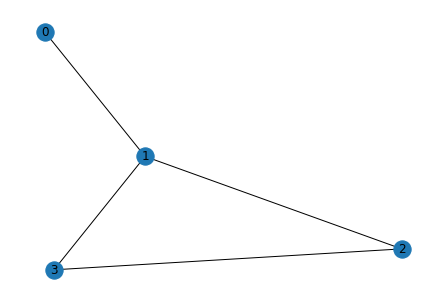

In [159]:
import networkx as nx
g = nx.Graph() 
for pair in edges:
    g.add_edge(*pair)
nx.draw(g, with_labels = True)
